## Text Processing ##

Text processing plays a very important role in NLP. It is the essential first step for almost all NLP approaches. It involves processing a text corpus (a collection of documents where a document consists of a set of words). The processing involves several steps which include: 
* Parsing
* Tokenization
* Stemming 

In addition we often perform some type of text statistics which usually involves counting the number of times words appear in a collection.


In this lab session we are going to cover all of these steps and utilize them to process Amazon product reviews. This dataset was provided to us by Prof. Julian McAuley from UCSD who reminded me to make sure that we cite his papers that use this data:  
* R. He, J. McAuley. Modeling the visual evolution of fashion trends with one-class collaborative filtering. WWW, 2016  
* J. McAuley, C. Targett, J. Shi, A. van den Hengel. Image-based recommendations on styles and substitutes. SIGIR, 2015


This dataset consists of reviews across 24 different product categories with a total number of $\approx$142 million reviews. For this lab session we will be using a subset of 1000 reviews from the "Cell Phones and Accessories" category whose original set contains $\approx$200k reviews. 
All throughout this lab session we will be using the nltk package:  
http://www.nltk.org

The reviews data is semi-structured and is in a json file format. Below is the data structure of one such review:  
`
{
  "reviewerID": "A3HVRXV0LVJN7",
  "asin": "0110400550",
  "reviewerName": "BiancaNicole",
  "helpful": [
    4,
    4
  ],
  "reviewText": "Best phone case ever . Everywhere I go I get a ton of compliments on it. It was in perfect condition as well.",
  "overall": 5.0,
  "summary": "A++++",
  "unixReviewTime": 1358035200,
  "reviewTime": "01 13, 2013"
}
`  

This dataset comes with a set of python functions that will help us convert the reviews from json format to pandas dataframes. 

In [1]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

Using these helper functions we'll first extract the reviews:

In [2]:
import pandas as pd
import gzip

review_file = "../../../data/amazon_reviews/cp/reviews_Cell_Phones_and_Accessories_h1k.json.gz"

df = getDF(review_file)
print (df['reviewText'])

0      The case pictured is a soft violet color, but ...
1      Saw this same case at a theme park store for 2...
2      case fits perfectly and I always gets complime...
3      Best phone case ever . Everywhere I go I get a...
4      It may look cute. This case started off pretty...
5      ITEM NOT SENT from Blue Top Company in Hong Ko...
6      this is a cute case, I bought it for my wife b...
7      it came in ok but there was a crack on the lef...
8      The case is good, but the two pieces do not fi...
9      I got this for my 14 year old sister.  She lov...
10     The case is super cute, durable, and a convers...
11     I had to super glue the two parts together bec...
12     This case is extremely durabl;e. I've dropped ...
13     I ordered this as a birthday present for my si...
14     I ordered this and received it within two week...
15     I like the case for its colors, but the lower ...
16     As excited as I was to purchase this item, the...
17     I got the case very quic

Now that we've extracted the review fields we'll tokenize them. More specifically in this next step we'll perform the following:
* Extract sentences
* Tokenize words
* Remove stopwords  

We'll use the "nltk.sent_tokenize" method to extract sentences from the text and the "nltk.word_tokenize" method to tokenize words in a sentence. 

In [3]:
import nltk
#load the nltk default English stopwords list:
stopwords_list = nltk.corpus.stopwords.words('english')
all_words = list()
tokenized_sent = list()
r_count=0
for review in df['reviewText']:
    r_count+=1
    if (r_count%100==0):
        print (r_count)
    sentences = nltk.sent_tokenize(review)
    for sentence in sentences:
        sent_tok = nltk.word_tokenize(sentence)
        #remove stopwords:
        sent_tok = [word for word in sent_tok if word not in stopwords_list]
        print (" Original=["+sentence+"]")
        #create a tokenized version of the sentence:
        sent_tok_str = " ".join(word for word in sent_tok)
        print ("Tokenized=["+sent_tok_str+"]")
        #create a list of all tokenized words across all sentences:
        for word in sent_tok:
            all_words.append(word.lower())

 Original=[The case pictured is a soft violet color, but the case cover I received was a dark purple.]
Tokenized=[The case pictured soft violet color , case cover I received dark purple .]
 Original=[While I'm sure the quality of the product is fine, the color is very different.]
Tokenized=[While I 'm sure quality product fine , color different .]
 Original=[Saw this same case at a theme park store for 25 dollars.]
Tokenized=[Saw case theme park store 25 dollars .]
 Original=[This is very good quality for a great price.]
Tokenized=[This good quality great price .]
 Original=[case fits perfectly and I always gets compliments on it its hasn't cracked when I dropped it.]
Tokenized=[case fits perfectly I always gets compliments n't cracked I dropped .]
 Original=[wonderful and protective.]
Tokenized=[wonderful protective .]
 Original=[Best phone case ever .]
Tokenized=[Best phone case ever .]
 Original=[Everywhere I go I get a ton of compliments on it.]
Tokenized=[Everywhere I go I get ton

 Original=[These are awesome and make my phone look so stylish!]
Tokenized=[These awesome make phone look stylish !]
 Original=[I have only used one so far and have had it on for almost a year!]
Tokenized=[I used one far almost year !]
 Original=[CAN YOU BELIEVE THAT!]
Tokenized=[CAN YOU BELIEVE THAT !]
 Original=[ONE YEAR!!]
Tokenized=[ONE YEAR ! !]
 Original=[Great quality!]
Tokenized=[Great quality !]
 Original=[I loved these.]
Tokenized=[I loved .]
 Original=[Great price and they look very cute.]
Tokenized=[Great price look cute .]
 Original=[I used these for my iPhone.]
Tokenized=[I used iPhone .]
 Original=[I gave some to friends and they loved too.]
Tokenized=[I gave friends loved .]
 Original=[The patterns do vary just like in the picture but they are high quality and I've only had to use one so far.]
Tokenized=[The patterns vary like picture high quality I 've use one far .]
 Original=[Cute Love them .My Ipad finally matches my iPhone.]
Tokenized=[Cute Love .My Ipad finally ma

 Original=[(y)]
Tokenized=[( )]
 Original=[I just feel in love with this, too cute.]
Tokenized=[I feel love , cute .]
 Original=[I went back and ordered ones for all my friends who think their queens!]
Tokenized=[I went back ordered ones friends think queens !]
 Original=[I like the design of it but it broke the moment I put it on my phone.]
Tokenized=[I like design broke moment I put phone .]
 Original=[Will be getting some superglue and try to fix it.]
Tokenized=[Will getting superglue try fix .]
 Original=[I would give it a 1 star but I liked the design so I had to give it 2 stars.]
Tokenized=[I would give 1 star I liked design I give 2 stars .]
 Original=[Cheaply made!]
Tokenized=[Cheaply made !]
 Original=[It's very pretty and the different color light stones make it shine beautifully.]
Tokenized=[It 's pretty different color light stones make shine beautifully .]
 Original=[The down side is that it does not fit snuggly in the dust plug hole and falls out very easily.]
Tokenized=[

 Original=[I,ve bought 4 of these and 2 don't work!]
Tokenized=[I , bought 4 2 n't work !]
 Original=[so it's hit or miss, I guess it's a toss up to luck but they are cheap and didn't break my bank.]
Tokenized=['s hit miss , I guess 's toss luck cheap n't break bank .]
 Original=[Although I have to say it's a poor percentage 50/50.]
Tokenized=[Although I say 's poor percentage 50/50 .]
 Original=[It would have been better if at least 3 worked!]
Tokenized=[It would better least 3 worked !]
 Original=[My kind of luck, the 2  I gave away, one to my sister in law, and one to her daughter, didn't work.]
Tokenized=[My kind luck , 2 I gave away , one sister law , one daughter , n't work .]
 Original=[How embarrassing !]
Tokenized=[How embarrassing !]
 Original=[I bought this couple month ago, only work once then got really HOT and burned, this product can be dangerous, don't buy it!]
Tokenized=[I bought couple month ago , work got really HOT burned , product dangerous , n't buy !]
 Original=[

 Original=[Don't waste your time or money on this]
Tokenized=[Do n't waste time money]
 Original=[This item was exactly what I hopped it would be - it was exactly what I was looking for in my order.]
Tokenized=[This item exactly I hopped would - exactly I looking order .]
 Original=[Excellent product, will use again.]
Tokenized=[Excellent product , use .]
 Original=[Was looking for this type of product to charge the many electronic products I have (iPhone, iPad, Samsung Galaxy S III).]
Tokenized=[Was looking type product charge many electronic products I ( iPhone , iPad , Samsung Galaxy S III ) .]
 Original=[This device would not operate my Samsung Galaxy or my daughters Iphone.]
Tokenized=[This device would operate Samsung Galaxy daughters Iphone .]
 Original=[Waste of money.]
Tokenized=[Waste money .]
 Original=[Not worth the postage to send it back...]
Tokenized=[Not worth postage send back ...]
 Original=[I bought this to use in my daughters car, which is older and does not have a 

**[Assignment 1]**
Spend some time to go over the code and compare the sentences generated from the tokenization step with the original ones. 

Next we'll compute the frequency count across all words in the collection:

In [4]:
import numpy as np
frequency_count = nltk.FreqDist(all_words)
words =np.array([word for word in frequency_count.keys()])
word_freq=np.array([word for word in frequency_count.values()])

We'll then sort words in the collection using their frequency count:

In [5]:
freq_sort = np.argsort(word_freq)[::-1]
word_freq_sort =word_freq[freq_sort]
words_sorted = words[freq_sort]

Print the sorted words and write them to a file:

In [6]:
output = open(review_file+".fc",'w')
rank=1
for object in words_sorted:
    output.write(object+"\t"+str(frequency_count[object])+"\n")
    if (rank<=100):
        print(object+"\t"+str(frequency_count[object]))
    rank+=1
output.close()

.	2465
i	1535
,	1214
!	592
phone	501
case	468
n't	372
it	320
the	254
one	247
's	235
would	218
great	209
charge	192
product	187
like	186
charger	166
this	153
time	152
love	150
get	147
works	141
car	139
good	139
)	137
...	136
use	126
well	122
(	118
really	111
work	109
got	106
bought	101
price	101
charging	100
iphone	98
;	98
even	97
&	94
battery	92
buy	91
recommend	91
also	86
item	84
little	81
two	78
nice	77
usb	74
cute	73
fit	71
much	71
:	71
2	70
've	69
long	67
money	66
still	66
looks	64
not	61
#	60
came	59
'm	59
light	59
better	58
power	58
thing	56
my	56
cover	55
quality	55
first	54
could	54
cheap	54
button	53
ordered	52
port	52
worth	52
easy	51
pretty	51
fits	50
way	49
plugged	48
made	48
day	47
fine	47
glass	47
working	47
screen	47
using	46
ipad	46
worked	46
look	46
design	45
device	45
received	45
broke	45
though	44
34	44
back	43
home	43
very	42


**[Assignment 2]**  
Going over the sorted list you've shurley noticed that the tokenizer outputted many single characters, some of which are punctuation marks. In general single character tokens don't carry any useful information and therefore are filtered out. 
Revisit the tokenization code above and remove single character tokens by checking on the token length. Token length could be checked using the "len" method which we also cover in class.

**[Solution 2]**
substitute the above expression for "sent_tok" with the following one:

In [7]:
 sent_tok = [word for word in sent_tok if word not in stopwords_list and len(word) >1]

During the lab session we also wrote code on how to read the frequency count file that we created earlier. Below is the code:

In [8]:
infile = open(review_file+".fc",'r')
rank=1
for line in infile.readlines():
    line=line.strip()
    elem = line.split("\t")
    if (rank<=100):
        print(elem[0]+"\t"+elem[1])
    rank+=1
infile.close()

.	2465
i	1535
,	1214
!	592
phone	501
case	468
n't	372
it	320
the	254
one	247
's	235
would	218
great	209
charge	192
product	187
like	186
charger	166
this	153
time	152
love	150
get	147
works	141
car	139
good	139
)	137
...	136
use	126
well	122
(	118
really	111
work	109
got	106
bought	101
price	101
charging	100
iphone	98
;	98
even	97
&	94
battery	92
buy	91
recommend	91
also	86
item	84
little	81
two	78
nice	77
usb	74
cute	73
fit	71
much	71
:	71
2	70
've	69
long	67
money	66
still	66
looks	64
not	61
#	60
came	59
'm	59
light	59
better	58
power	58
thing	56
my	56
cover	55
quality	55
first	54
could	54
cheap	54
button	53
ordered	52
port	52
worth	52
easy	51
pretty	51
fits	50
way	49
plugged	48
made	48
day	47
fine	47
glass	47
working	47
screen	47
using	46
ipad	46
worked	46
look	46
design	45
device	45
received	45
broke	45
though	44
34	44
back	43
home	43
very	42


**[Assignment 3]**  
The default NLTK tokenizer utilizes conventions from the Penn Treebank corpus one of which is to separates contractions. Let's look at an example:


In [9]:
nltk.word_tokenize("I wouldn't")

['I', 'would', "n't"]

An alternative to the Penn Treebank tokenizer is the PunktWordTokenizer which splits on the actual punctuation. Below is an example on how to utilize it:

In [10]:
import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer.tokenize("wouldn't")

["wouldn't"]

Tokenize the collection using this tokenizer.

**[Solution 3]**  
Load the new tokenizer:  

In [11]:
import nltk.data 
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

and substitute the following expression:

In [12]:
sent_tok = nltk.word_tokenize(sentence)

with this one:

In [13]:
sent_tok = nltk.word_tokenize(sentence)

### Stemming ###
In the previous lecture we learned about stemming and we also did an overview of the two most common stemmers - the Porter and the Krovetz stemmers. We'll now use the Porter stemmer to stem our collection. 

**[Assignment 4]**  
Revisit the tokenization code above and using the NLTK implementation of the Porter stemmer to stem the collection. You can instantiate the NLTK Porter stemmer using the following code:

In [14]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

To stem a word you would call the "stem" method. Below is an example:

In [15]:
porter_stemmer.stem("beautiful")

'beauti'

**[Solution 4]**  
Load the PorterStemmer and substitute the above expression for "sent_tok" with the following one:

In [16]:
 sent_tok = [porter_stemmer.stem(word) for word in sent_tok if word not in stopwords_list]

### Frequency Plot ###

**[Assignment 5]**  
Yesterday we went over some example of plotting data in python. In this assignment you are asked to plot the frequency count versus the rank. We already have the frequency count stored in the list "word_freq_sort". We are also providing you with a rank list. You should use log scale for both axis. Computing a log over an numpy array could be done with the "np.log" method. 

**[Solution 5]**

range(1, 3954)


<IPython.core.display.Javascript object>


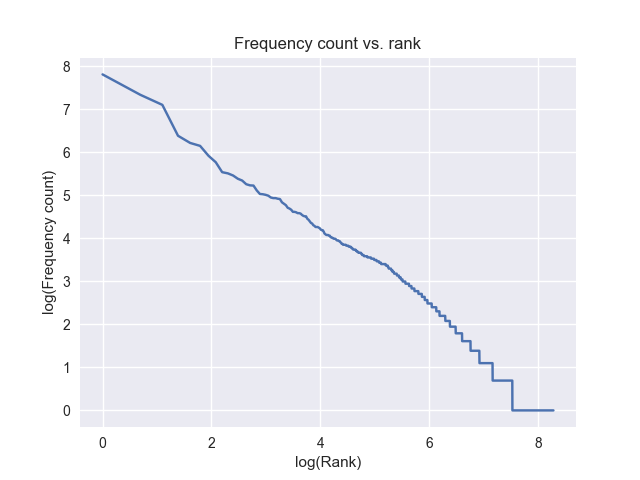

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib notebook

#generate an array of ranks:
rank= range(1,len(words_sorted)+1)
print (rank)
#generate an array of frequency counts:
freq = np.array(word_freq_sort)

fig = plt.figure()
#enter your solution here:
plt.plot(np.log(rank),np.log(freq))
#plt.plot(rank,pr)
plt.title('Frequency count vs. rank')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency count)')
plt.show()

**[Assignment 6 (Optional]**  
So far we've used 1000 product reviews. In the data folder there are also sets of 5k and 10k reviews. If time permits you should perform the same text statistics over these collections. 
In addition to this category reviews we've provided you with reviews (1k, 5k, and 10k) for 4 additional  categories:  
* Beauty
* Clothing, Shoes and Jewelery
* Digital Music
* Tools and Home Improvement

**[Solution 6]**